In [131]:
import numpy as np
import pandas as pd

In [132]:
filter_phrases = ['great cross-z',
                'great cross z',
                'great-cross',
                'best match',
                'best-match',
                'bestmatch',
                'ultimate',
                'extreme',
                'fake kamen', 
                'beast', 
                'great leader', 
                'brave', 
                'grand zi-o', 
                'grand zio',
                'grand zi o',
                'great eye', 
                'great emperor', 
                'cancer', 
                'great ten-faced', 
                'great ten', 
                'great demia', 
                'shocker',
                'black satan', 
                'black woz']

This is just to figure things out, remove later or whatever

1) Remove filter words/phrases
2) Tokenize
3) Lemmatize

Filter words must be removed first so they aren't lemmatized or split and unfiltered

In [133]:
comments = pd.read_csv(r'C:/Users/Spencer/Documents/GitHub/r_kamenrider/scrape/r_kamenrider_comments_cut')

In [134]:
comments = comments.dropna(subset = ['body'])

In [135]:
test_id = comments[comments['body'].str.contains('great cross z')]['id'].tolist()[0]
test_body = comments[comments['body'].str.contains('great cross z')]['body'].tolist()[0]
test_author = comments[comments['body'].str.contains('great cross z')]['author'].tolist()[0]

In [136]:
filtered_count = 0
def phrase_filter(instr, filter_phrases):
    for phrase in filter_phrases:
        if phrase in instr:
            global filtered_count
            filtered_count += 1
            instr = instr.replace(phrase, '')
    return instr

In [137]:
test_instr = 'this contains great cross z'
phrase_filter(test_instr, filter_phrases)

'this contains '

In [138]:
comments['body'] = comments['body'].apply(lambda x: phrase_filter(x, filter_phrases))

In [139]:
result_body = comments[comments['id']==test_id]['body'].tolist()[0]

In [140]:
result_body == test_body

False

In [141]:
keywords = {'v3': [['v3']], 
            'x': [['x']], 
            'amazon': [['amazon']], 
            'stronger': [['stronger']], 
            'skyrider': [['skyrider']], 
            'super-1': [['super-1'], ['super', '1']], 
            'black': [['black']], 
            'black rx': [['black', 'rx']], 
            'kuuga': [['kuuga'], ['kuga']], 
            'agito': [['agito']], 
            'ryuki': [['ryuki']], 
            '555': [['555'], ['faiz']], 
            'blade': [['blade']], 
            'hibiki': [['hibiki']], 
            'kabuto': [['kabuto']], 
            'den-o': [['den-o'], ['deno'], ['den', 'o']],  
            'kiva': [['kiva']], 
            'decade': [['decade']], 
            'w': [['w'], ['double']],
            'ooo': [['ooo']], 
            'fourze': [['fourze']], 
            'wizard': [['wizard']], 
            'gaim': [['gaim']], 
            'drive': [['drive']], 
            'ghost': [['ghost']], 
            'amazons': [['amazons']], 
            'ex-aid': [['ex-aid'], ['exaid'], ['ex', 'aid']], 
            'build': [['build']], 
            'zi-o': [['zi-o'], ['zio'], ['zi', 'o']]
            }

In [142]:
filtered_count / len(comments['id']) #worth it?

0.012421456830346754

In [143]:
comments = comments.drop(comments[comments['author'] == 'AutoModerator'].index)
# AutoModerator posts probably don't have particular sentiment, but it's easier to remove than check

In [144]:
comments['author'].value_counts().to_dict() # biggest posters

{'Screwbreaker': 1839,
 'BananaArms': 1406,
 'GregorScrungus': 1238,
 'Connortsunami': 1053,
 'MangaArtist16': 890,
 'kyoya242': 847,
 'DragonRanger117': 809,
 'Blackewolfe': 764,
 'armdaggerblade': 756,
 'vilebrenman': 715,
 'CSlv': 704,
 'Nihon_Hanguk': 702,
 'Chaosbrushogun': 668,
 'rattatatouille': 651,
 'PineappleSlices': 616,
 'kitevii': 605,
 'niv13': 591,
 'Sedirex_KR': 582,
 'The-Bigger-Fish': 581,
 'KaziArmada': 573,
 'TheArtofPolitik': 559,
 'KaiserNazrin': 555,
 'CZ-Bitcoins': 542,
 'tokulord': 540,
 'shiki88': 537,
 'CannonFodderrx': 529,
 'Draconilian': 503,
 'TendoSoujiro': 499,
 'TM1619': 497,
 'ZephyrPhantom': 483,
 'CrashmanX': 470,
 'Luq_Kun': 465,
 'lolasian101': 463,
 'ex-aid911': 458,
 'VoyeurTheNinja': 443,
 'Tchado': 443,
 'Hraklea': 443,
 'FireFury190': 442,
 'Streak244': 433,
 'telenstias': 414,
 'jxher123': 405,
 'smarsapan': 403,
 'Krofisplug': 396,
 'Ahmes004': 394,
 'Plamobot': 393,
 'LucidDreamScape': 384,
 'TheRealNebuLord': 381,
 'SleepyCowie': 369,
 'r

In [145]:
lowest = comments.sort_values('score').head(1) # the lowest rated comment

In [146]:
print(lowest['body'].tolist()[0])

Oh gawd, dont tell me the gay thing was shoehorned in because of their misguided image of America of pro-homosexuality so they felt the need to gay things up to suit their tastes.


In [147]:
print(lowest['score'].tolist()[0]) # not that low

-43


In [148]:
len(comments['author'].value_counts().tolist()) # number of unique commenters (minus AutoModerator)

6038

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
test = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
test

,a,b
0,1,3
1,2,4


In [151]:
for i, r in test.iterrows():
    print(r['a'])

1
2


In [152]:
comments.head(2)

,id,_reddit,_replies,_submission,author,body,controversiality,created,created_utc,depth,distinguished,gilded,is_submitter,link_id,no_follow,parent_id,permalink,score,score_hidden,send_replies
0,c1ze8ay,<praw.reddit.Reddit object at 0x0000022989DB9710>,<praw.models.comment_forest.CommentForest obje...,hy74u,Sparrowsluck,Oh man suddenly there are people here. I shoul...,0,1.307984e+09,1.307955e+09,0,NaN,0,False,t3_hy74u,True,t3_hy74u,/r/KamenRider/comments/hy74u/this_falls_kamen_...,2,False,True
1,c205hdu,<praw.reddit.Reddit object at 0x0000022989DB9710>,<praw.models.comment_forest.CommentForest obje...,i1nme,StimulusResponse,This was a great episode. I'm not going to spo...,0,1.308295e+09,1.308267e+09,0,NaN,0,True,t3_i1nme,True,t3_i1nme,/r/KamenRider/comments/i1nme/ooo_38_hd/c205hdu/,1,False,True


In [153]:
import nltk

In [154]:
# Need data structure containing series, number of mentions, average sentiment for each series
# Sentiment calculation for series: 
# si = sentiment value of comment i
# S = net sentiment of series
# u = score in upvotes/downvotes of comment i
# n = # of mentions of series
# S = summation(u * si) / n
# I consider an upvote or downvote an agree/disagree, ie the score of a comment represents the subreddits agreeance with it
# So, a comment with a sentiment of 0.5 with ten upvotes is the same as ten comments with sentiment of 0.5
# I should probably return a series sentiment on a monthly basis or similar to get sentiments over time

In [155]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spencer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spencer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
comments['body_tokenized'] = comments['body'].apply(lambda x: word_tokenize(x))

In [157]:
stop = set(stopwords.words('english'))

In [158]:
def stop_punc_remover(tokenized_text):
    no_stops = []
    for word in tokenized_text:
        if (word not in stop) and (word not in string.punctuation) :
            no_stops.append(word)
    return no_stops

In [159]:
comments['body_no_punc_stops'] = comments['body_tokenized'].apply(lambda x: stop_punc_remover(x))

In [191]:
def get_show(tokenized_text, search_dict):
    found_order = []
    counts = {}
    indices_to_title = {}
    title_to_indices = {} # there is probably a better way but this is fine
    gothere = False
        
    # Records mentions of every title
    # Note: This could be more efficient with each title spelling as keys in the dict
    # The difference would be marginal on this short dict but I'd change it for a larger one
    for i in range(len(tokenized_text)): # for every index in the text
        for key in search_dict.keys(): # for every show
            for lst in search_dict[key]: # for each list of parts of title
                j = 0
                while (j < len(lst)) and (j+i < len(tokenized_text)) and (lst[j] == tokenized_text[j+i]):
                    # checking each part of show title
                    j += 1 # iterating if each part of title matches each index that would contain the title
                if j == len(lst): # records found title if string matched for each part of title
                    if key not in found_order:
                        found_order.append(key)
                    if key not in counts.keys():
                        counts[key] = 0
                    counts[key] += 1
                    if i not in indices_to_title.keys():
                        indices_to_title[i] = []
                    indices_to_title[i].append(key) # adds title to list of titles under that index so I can check for doubles
                    if key not in title_to_indices.keys():
                        title_to_indices[key] = []
                    title_to_indices[key].append(i)
          
    # Deals with doubles at an index, eg ['black', 'rx'] returning both 'black' and 'black rx'
    for index in indices_to_title.keys():
        if len(indices_to_title[index]) > 1:
            splitcounts = [title.count(' ') + title.count('-') for title in indices_to_title[index]]
            # if a title has splits at a space or dash and appeared it is the relevant title, not the shorter
            # one within
            index_of_longest = splitcounts.index(max(splitcounts))
            longest = indices_to_title[index][index_of_longest]
            for title in indices_to_title[index]: # uncounts each title that isn't the longest
                if title != longest:
                    counts[title] -= 1
            indices_to_title[index] = [longest]
                
    # Finds which title is actually mentioned most
    current_max = 0
    current_winner = None
    for title in counts: # finds max of mentions and picks the first found for ties
        if counts[title] > current_max:
            current_max = counts[title]
            current_winner = title
        elif counts[title] == current_max > 0: # chooses first found in case of tie
            # finds the lowest index between the contender and current_winner's lowest found indices
            # this is, of course, the one mentioned first
            min_index = min(min(title_to_indices[title]), min(title_to_indices[current_winner]))
            current_winner = indices_to_title[min_index][0] # gets that title from the other dict
    
    return current_winner

In [192]:
test1 = ['black', 'black', 'rx'] # black
test2 = ['black', 'rx'] # black rx
test3 = ['black', 'rx', 'black'] # black rx
test4 = ['black', 'black', 'black', 'rx', 'black', 'rx', 'black', 'rx'] # black rx
test5 = ['black', 'black', 'black', 'rx'] # black
test6 = ['zi', 'o'] # zi-o
test7 = ['exaid'] # ex-aid
test8 = ['fourze', 'build'] # fourze
test9 = ['build', 'fourze'] # build

In [193]:
[get_show(test1, keywords),
get_show(test2, keywords),
get_show(test3, keywords),
get_show(test4, keywords),
get_show(test5, keywords),
get_show(test6, keywords),
get_show(test7, keywords),
get_show(test8, keywords),
get_show(test9, keywords)]

['black',
 'black rx',
 'black rx',
 'black rx',
 'black',
 'zi-o',
 'ex-aid',
 'fourze',
 'build']

In [194]:
comments['primary_show'] = comments['body_no_punc_stops'].apply(lambda x: get_show(x, keywords))

In [195]:
comments_with_shows = comments[~comments['primary_show'].isnull()]

In [196]:
mention_counts = comments_with_shows['primary_show'].value_counts().to_dict()

In [197]:
mention_counts

{'build': 1006,
 'decade': 833,
 'black': 672,
 'drive': 615,
 'ghost': 614,
 'stronger': 598,
 '555': 553,
 'w': 422,
 'zi-o': 411,
 'wizard': 397,
 'ex-aid': 396,
 'gaim': 344,
 'fourze': 286,
 'x': 274,
 'blade': 261,
 'kiva': 219,
 'kabuto': 219,
 'kuuga': 215,
 'ryuki': 172,
 'amazon': 154,
 'den-o': 147,
 'amazons': 121,
 'hibiki': 101,
 'agito': 94,
 'ooo': 90,
 'v3': 14,
 'black rx': 12,
 'skyrider': 4,
 'super-1': 1}

In [205]:
from datetime import datetime
comments_with_shows['datetime'] = comments_with_shows['created_utc'].apply(lambda x: datetime.fromtimestamp(x))

C:\Users\Spencer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [240]:
slices = {}
for title in keywords.keys():
    slices[title] = comments_with_shows.loc[comments_with_shows['primary_show'] == title]

C:\Users\Spencer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Spencer\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Spencer\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Spencer\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Spencer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: Run

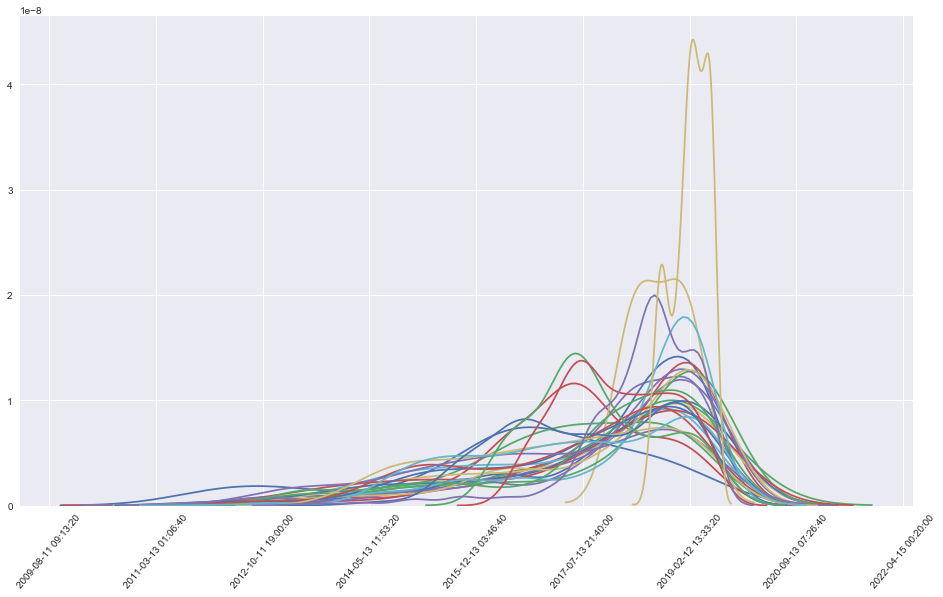

In [241]:
sns.set(rc={'figure.figsize':(16,9)})

for series in slices.values():
    sns.distplot(series['created_utc'].tolist(), hist=False)

ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticklabels([datetime.fromtimestamp(x) for x in xticks], rotation=50)
plt.show()

C:\Users\Spencer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


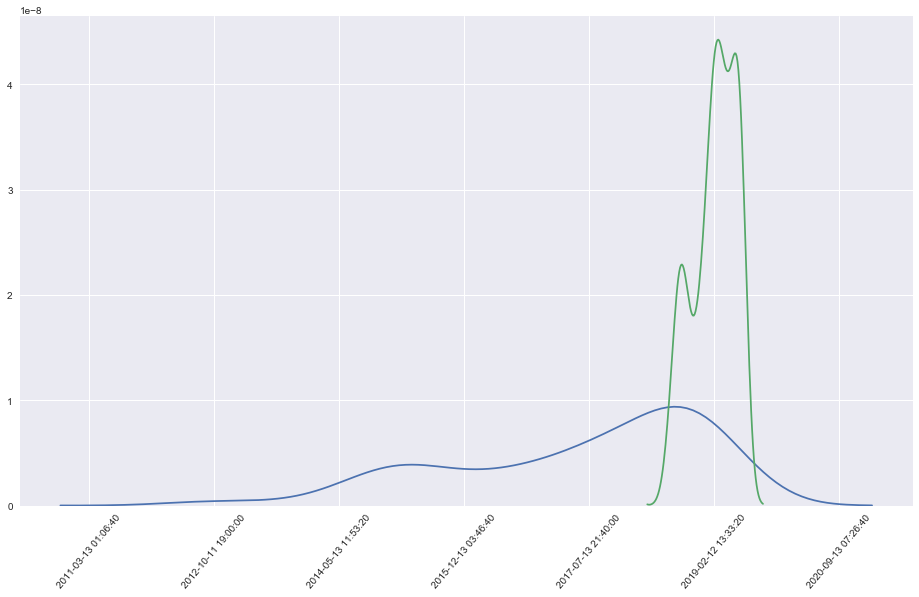

In [239]:
sns.set(rc={'figure.figsize':(16,9)})

fourze_comments = comments_with_shows.loc[comments_with_shows['primary_show'] == 'fourze']
fourze_dates = fourze_comments['created_utc'].tolist()
sns.kdeplot(fourze_dates)

zio_comments = comments_with_shows.loc[comments_with_shows['primary_show'] == 'zi-o']
zio_dates = zio_comments['created_utc'].tolist()
sns.kdeplot(zio_dates)


ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticklabels([datetime.fromtimestamp(x) for x in xticks], rotation=50)
plt.show()